In [72]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import pandas as pd

# Skip the metadata lines at the top
df = pd.read_csv("/Users/adyant/Desktop/Delhi City/final_delhi.csv", skiprows=4)

# Show basic info
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61791 entries, 0 to 61790
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Timestamp            61791 non-null  object
 1   PM2.5 (µg/m³)        58366 non-null  object
 2   PM10 (µg/m³)         57561 non-null  object
 3   NO (µg/m³)           57151 non-null  object
 4   NO2 (µg/m³)          58121 non-null  object
 5   NOx (ppb)            57448 non-null  object
 6   NH3 (µg/m³)          48186 non-null  object
 7   SO2 (µg/m³)          48939 non-null  object
 8   CO (mg/m³)           58290 non-null  object
 9   Ozone (µg/m³)        57941 non-null  object
 10  Benzene (µg/m³)      44992 non-null  object
 11  Toluene (µg/m³)      42886 non-null  object
 12  Xylene (µg/m³)       9296 non-null   object
 13  O Xylene (µg/m³)     1 non-null      object
 14  Eth-Benzene (µg/m³)  6227 non-null   object
 15  MP-Xylene (µg/m³)    7311 non-null   object
 16  AT (

/var/folders/q6/fgxtj7lj5gqgvxrlm3r5ym_c0000gn/T/ipykernel_21528/3713709636.py:4: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Users/adyant/Desktop/Delhi City/final_delhi.csv", skiprows=4)


In [4]:

df['PM2.5 (µg/m³)'] = df['PM2.5 (µg/m³)'].replace(['NA', 'N/A', 'na', 'null', '--', ''], pd.NA)

# Step 2: Convert to numeric (this will turn invalid entries to NaN if missed)
df['PM2.5 (µg/m³)'] = pd.to_numeric(df['PM2.5 (µg/m³)'], errors='coerce')

df['PM2.5 (µg/m³)'] = df['PM2.5 (µg/m³)'].interpolate(method='linear')

# Optional: Confirm cleaning
print(df['PM2.5 (µg/m³)'].isna().sum())  # Should be 0
print(df['PM2.5 (µg/m³)'].dtype)        # Should be float64


0
float64


In [5]:
df.head()

,Timestamp,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,2020-01-01 00:00:00,239.12,283.79,9.83,52.62,36.11,13.14,14.06,1.71,24.37,...,NaN,5.95,77.59,NaN,335.33,NaN,0.00,102.74,998.15,NaN
1,2020-01-02 00:00:00,217.71,304.96,58.13,52.97,75.73,8.83,16.60,2.00,22.28,...,NaN,6.36,75.28,NaN,335.21,NaN,0.00,114.20,997.78,NaN
2,2020-01-03 00:00:00,214.27,320.42,54.65,48.15,71.92,18.40,12.62,2.09,26.81,...,NaN,12.65,69.76,NaN,268.74,NaN,0.00,115.33,995.88,NaN
3,2020-01-04 00:00:00,225.02,321.31,63.12,49.91,77.34,30.49,11.93,1.79,23.81,...,NaN,15.06,66.60,NaN,254.00,NaN,0.00,94.90,994.96,NaN
4,2020-01-05 00:00:00,183.82,253.86,9.34,39.85,28.84,26.35,10.45,1.19,30.83,...,NaN,11.10,63.15,NaN,258.40,NaN,0.00,89.71,995.39,NaN


In [6]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
  Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [7]:
import seaborn as sns

In [8]:
df = df.dropna(thresh=10, axis=1)


In [9]:
df

,Timestamp,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,2020-01-01 00:00:00,239.12,283.79,9.83,52.62,36.11,13.14,14.06,1.71,24.37,...,NaN,5.95,77.59,NaN,335.33,NaN,0.00,102.74,998.15,NaN
1,2020-01-02 00:00:00,217.71,304.96,58.13,52.97,75.73,8.83,16.60,2.00,22.28,...,NaN,6.36,75.28,NaN,335.21,NaN,0.00,114.20,997.78,NaN
2,2020-01-03 00:00:00,214.27,320.42,54.65,48.15,71.92,18.40,12.62,2.09,26.81,...,NaN,12.65,69.76,NaN,268.74,NaN,0.00,115.33,995.88,NaN
3,2020-01-04 00:00:00,225.02,321.31,63.12,49.91,77.34,30.49,11.93,1.79,23.81,...,NaN,15.06,66.60,NaN,254.00,NaN,0.00,94.90,994.96,NaN
4,2020-01-05 00:00:00,183.82,253.86,9.34,39.85,28.84,26.35,10.45,1.19,30.83,...,NaN,11.10,63.15,NaN,258.40,NaN,0.00,89.71,995.39,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61786,2024-10-16,122.21,357.42,28.78,82.16,67.08,55.48,15.58,1.62,49.15,...,NaN,29.61,55.39,0.3,NaN,0.0,0.0,82.97,986.25,NaN
61787,2024-10-17,215.88,504.88,71.47,85.44,103.61,59.01,20.35,1.15,69.5,...,NaN,30.66,61.39,0.3,NaN,0.0,0.0,94.65,998.54,NaN
61788,2024-10-18,172.21,458.5,93.98,85.14,121.63,61.15,19.14,2.75,42.79,...,NaN,30.41,59.84,0.3,NaN,0.0,0.0,86.83,997.01,NaN
61789,2024-10-19,112.75,418.58,65.68,89.55,101.5,71.83,19.05,1.64,34.38,...,NaN,30.75,61.05,0.3,NaN,0.01,0.01,89.23,992.3,NaN


In [10]:
df = df.drop(columns=['MP-Xylene (µg/m³)'])


In [11]:
df

,Timestamp,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,Eth-Benzene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,2020-01-01 00:00:00,239.12,283.79,9.83,52.62,36.11,13.14,14.06,1.71,24.37,...,NaN,5.95,77.59,NaN,335.33,NaN,0.00,102.74,998.15,NaN
1,2020-01-02 00:00:00,217.71,304.96,58.13,52.97,75.73,8.83,16.60,2.00,22.28,...,NaN,6.36,75.28,NaN,335.21,NaN,0.00,114.20,997.78,NaN
2,2020-01-03 00:00:00,214.27,320.42,54.65,48.15,71.92,18.40,12.62,2.09,26.81,...,NaN,12.65,69.76,NaN,268.74,NaN,0.00,115.33,995.88,NaN
3,2020-01-04 00:00:00,225.02,321.31,63.12,49.91,77.34,30.49,11.93,1.79,23.81,...,NaN,15.06,66.60,NaN,254.00,NaN,0.00,94.90,994.96,NaN
4,2020-01-05 00:00:00,183.82,253.86,9.34,39.85,28.84,26.35,10.45,1.19,30.83,...,NaN,11.10,63.15,NaN,258.40,NaN,0.00,89.71,995.39,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61786,2024-10-16,122.21,357.42,28.78,82.16,67.08,55.48,15.58,1.62,49.15,...,NaN,29.61,55.39,0.3,NaN,0.0,0.0,82.97,986.25,NaN
61787,2024-10-17,215.88,504.88,71.47,85.44,103.61,59.01,20.35,1.15,69.5,...,NaN,30.66,61.39,0.3,NaN,0.0,0.0,94.65,998.54,NaN
61788,2024-10-18,172.21,458.5,93.98,85.14,121.63,61.15,19.14,2.75,42.79,...,NaN,30.41,59.84,0.3,NaN,0.0,0.0,86.83,997.01,NaN
61789,2024-10-19,112.75,418.58,65.68,89.55,101.5,71.83,19.05,1.64,34.38,...,NaN,30.75,61.05,0.3,NaN,0.01,0.01,89.23,992.3,NaN


In [12]:
df = df.drop(columns=['Eth-Benzene (µg/m³)'])


In [13]:
df

,Timestamp,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,2020-01-01 00:00:00,239.12,283.79,9.83,52.62,36.11,13.14,14.06,1.71,24.37,...,0.67,5.95,77.59,NaN,335.33,NaN,0.00,102.74,998.15,NaN
1,2020-01-02 00:00:00,217.71,304.96,58.13,52.97,75.73,8.83,16.60,2.00,22.28,...,2.71,6.36,75.28,NaN,335.21,NaN,0.00,114.20,997.78,NaN
2,2020-01-03 00:00:00,214.27,320.42,54.65,48.15,71.92,18.40,12.62,2.09,26.81,...,4.19,12.65,69.76,NaN,268.74,NaN,0.00,115.33,995.88,NaN
3,2020-01-04 00:00:00,225.02,321.31,63.12,49.91,77.34,30.49,11.93,1.79,23.81,...,3.21,15.06,66.60,NaN,254.00,NaN,0.00,94.90,994.96,NaN
4,2020-01-05 00:00:00,183.82,253.86,9.34,39.85,28.84,26.35,10.45,1.19,30.83,...,0.91,11.10,63.15,NaN,258.40,NaN,0.00,89.71,995.39,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61786,2024-10-16,122.21,357.42,28.78,82.16,67.08,55.48,15.58,1.62,49.15,...,NaN,29.61,55.39,0.3,NaN,0.0,0.0,82.97,986.25,NaN
61787,2024-10-17,215.88,504.88,71.47,85.44,103.61,59.01,20.35,1.15,69.5,...,NaN,30.66,61.39,0.3,NaN,0.0,0.0,94.65,998.54,NaN
61788,2024-10-18,172.21,458.5,93.98,85.14,121.63,61.15,19.14,2.75,42.79,...,NaN,30.41,59.84,0.3,NaN,0.0,0.0,86.83,997.01,NaN
61789,2024-10-19,112.75,418.58,65.68,89.55,101.5,71.83,19.05,1.64,34.38,...,NaN,30.75,61.05,0.3,NaN,0.01,0.01,89.23,992.3,NaN


In [14]:
df.isnull().sum()


Timestamp              0
PM2.5 (µg/m³)          0
PM10 (µg/m³)        4230
NO (µg/m³)          4640
NO2 (µg/m³)         3670
NOx (ppb)           4343
NH3 (µg/m³)        13605
SO2 (µg/m³)        12852
CO (mg/m³)          3501
Ozone (µg/m³)       3850
Benzene (µg/m³)    16799
Toluene (µg/m³)    18905
Xylene (µg/m³)     52495
AT (°C)            22331
RH (%)             14677
WS (m/s)           16809
WD (deg)           14864
RF (mm)            28145
TOT-RF (mm)         5265
SR (W/mt2)         16240
BP (mmHg)          21961
VWS (m/s)          51619
dtype: int64

In [15]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)


Timestamp           0.000000
PM2.5 (µg/m³)       0.000000
PM10 (µg/m³)        6.845657
NO (µg/m³)          7.509184
NO2 (µg/m³)         5.939376
NOx (ppb)           7.028532
NH3 (µg/m³)        22.017770
SO2 (µg/m³)        20.799146
CO (mg/m³)          5.665874
Ozone (µg/m³)       6.230681
Benzene (µg/m³)    27.186807
Toluene (µg/m³)    30.595070
Xylene (µg/m³)     84.955738
AT (°C)            36.139567
RH (%)             23.752650
WS (m/s)           27.202991
WD (deg)           24.055283
RF (mm)            45.548705
TOT-RF (mm)         8.520658
SR (W/mt2)         26.282145
BP (mmHg)          35.540775
VWS (m/s)          83.538056
dtype: float64


In [16]:
df = df.drop(columns=['VWS (m/s)']) 

In [17]:
df = df.drop(columns=['Xylene (µg/m³)']) 

In [18]:
df

,Timestamp,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),Benzene (µg/m³),Toluene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg)
0,2020-01-01 00:00:00,239.12,283.79,9.83,52.62,36.11,13.14,14.06,1.71,24.37,1.77,3.74,5.95,77.59,NaN,335.33,NaN,0.00,102.74,998.15
1,2020-01-02 00:00:00,217.71,304.96,58.13,52.97,75.73,8.83,16.60,2.00,22.28,2.25,17.67,6.36,75.28,NaN,335.21,NaN,0.00,114.20,997.78
2,2020-01-03 00:00:00,214.27,320.42,54.65,48.15,71.92,18.40,12.62,2.09,26.81,2.22,31.51,12.65,69.76,NaN,268.74,NaN,0.00,115.33,995.88
3,2020-01-04 00:00:00,225.02,321.31,63.12,49.91,77.34,30.49,11.93,1.79,23.81,1.91,19.21,15.06,66.60,NaN,254.00,NaN,0.00,94.90,994.96
4,2020-01-05 00:00:00,183.82,253.86,9.34,39.85,28.84,26.35,10.45,1.19,30.83,1.24,9.35,11.10,63.15,NaN,258.40,NaN,0.00,89.71,995.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61786,2024-10-16,122.21,357.42,28.78,82.16,67.08,55.48,15.58,1.62,49.15,11.59,12.9,29.61,55.39,0.3,NaN,0.0,0.0,82.97,986.25
61787,2024-10-17,215.88,504.88,71.47,85.44,103.61,59.01,20.35,1.15,69.5,16.54,13.2,30.66,61.39,0.3,NaN,0.0,0.0,94.65,998.54
61788,2024-10-18,172.21,458.5,93.98,85.14,121.63,61.15,19.14,2.75,42.79,13.2,14.75,30.41,59.84,0.3,NaN,0.0,0.0,86.83,997.01
61789,2024-10-19,112.75,418.58,65.68,89.55,101.5,71.83,19.05,1.64,34.38,11.09,18.5,30.75,61.05,0.3,NaN,0.01,0.01,89.23,992.3


In [19]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)

Timestamp           0.000000
PM2.5 (µg/m³)       0.000000
PM10 (µg/m³)        6.845657
NO (µg/m³)          7.509184
NO2 (µg/m³)         5.939376
NOx (ppb)           7.028532
NH3 (µg/m³)        22.017770
SO2 (µg/m³)        20.799146
CO (mg/m³)          5.665874
Ozone (µg/m³)       6.230681
Benzene (µg/m³)    27.186807
Toluene (µg/m³)    30.595070
AT (°C)            36.139567
RH (%)             23.752650
WS (m/s)           27.202991
WD (deg)           24.055283
RF (mm)            45.548705
TOT-RF (mm)         8.520658
SR (W/mt2)         26.282145
BP (mmHg)          35.540775
dtype: float64


In [20]:
df

,Timestamp,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),Benzene (µg/m³),Toluene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg)
0,2020-01-01 00:00:00,239.12,283.79,9.83,52.62,36.11,13.14,14.06,1.71,24.37,1.77,3.74,5.95,77.59,NaN,335.33,NaN,0.00,102.74,998.15
1,2020-01-02 00:00:00,217.71,304.96,58.13,52.97,75.73,8.83,16.60,2.00,22.28,2.25,17.67,6.36,75.28,NaN,335.21,NaN,0.00,114.20,997.78
2,2020-01-03 00:00:00,214.27,320.42,54.65,48.15,71.92,18.40,12.62,2.09,26.81,2.22,31.51,12.65,69.76,NaN,268.74,NaN,0.00,115.33,995.88
3,2020-01-04 00:00:00,225.02,321.31,63.12,49.91,77.34,30.49,11.93,1.79,23.81,1.91,19.21,15.06,66.60,NaN,254.00,NaN,0.00,94.90,994.96
4,2020-01-05 00:00:00,183.82,253.86,9.34,39.85,28.84,26.35,10.45,1.19,30.83,1.24,9.35,11.10,63.15,NaN,258.40,NaN,0.00,89.71,995.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61786,2024-10-16,122.21,357.42,28.78,82.16,67.08,55.48,15.58,1.62,49.15,11.59,12.9,29.61,55.39,0.3,NaN,0.0,0.0,82.97,986.25
61787,2024-10-17,215.88,504.88,71.47,85.44,103.61,59.01,20.35,1.15,69.5,16.54,13.2,30.66,61.39,0.3,NaN,0.0,0.0,94.65,998.54
61788,2024-10-18,172.21,458.5,93.98,85.14,121.63,61.15,19.14,2.75,42.79,13.2,14.75,30.41,59.84,0.3,NaN,0.0,0.0,86.83,997.01
61789,2024-10-19,112.75,418.58,65.68,89.55,101.5,71.83,19.05,1.64,34.38,11.09,18.5,30.75,61.05,0.3,NaN,0.01,0.01,89.23,992.3


In [30]:
import sys
!{sys.executable} -m pip uninstall scikit-learn -y
!{sys.executable} -m pip install --no-cache-dir scikit-learn


Found existing installation: scikit-learn 1.6.1
Uninstalling scikit-learn-1.6.1:
  Successfully uninstalled scikit-learn-1.6.1
Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 11.1 MB 2.5 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [32]:
!python3 -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 1.8 MB 2.5 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [33]:
from sklearn.impute import KNNImputer


In [24]:
# Convert all feature columns to numeric safely
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [34]:
first_col = df.columns[0]
df_features = df.drop(columns=[first_col]) 
for col in df_features.columns:
    df_features[col] = pd.to_numeric(df_features[col], errors='coerce')

missing_percent = df_features.isnull().mean() * 100
print("Missing % per column:\n", missing_percent)

threshold = 30
low_missing_cols = missing_percent[missing_percent <= threshold].index.tolist()
high_missing_cols = missing_percent[missing_percent > threshold].index.tolist()

print("\nLow missing columns (simple fill):", low_missing_cols)
print("High missing columns (KNN fill):", high_missing_cols)


for col in low_missing_cols:
    median_value = df_features[col].median()
    df_features[col].fillna(median_value, inplace=True)


if high_missing_cols:
    imputer = KNNImputer(n_neighbors=5)
    df_high = df_features[high_missing_cols]
    
    df_high_imputed = imputer.fit_transform(df_high)
    
    df_features[high_missing_cols] = df_high_imputed

df_final = pd.concat([df[[first_col]], df_features], axis=1)

print("\nMissing values after mixed imputation:\n")
print(df_final.isnull().sum())


Missing % per column:
 PM2.5 (µg/m³)       0.000000
PM10 (µg/m³)        6.847275
NO (µg/m³)          7.510803
NO2 (µg/m³)         5.940995
NOx (ppb)           7.030150
NH3 (µg/m³)        22.019388
SO2 (µg/m³)        20.800764
CO (mg/m³)          5.667492
Ozone (µg/m³)       6.232299
Benzene (µg/m³)    27.188425
Toluene (µg/m³)    30.596689
AT (°C)            36.141186
RH (%)             23.754268
WS (m/s)           27.204609
WD (deg)           24.056901
RF (mm)            45.550323
TOT-RF (mm)         8.522277
SR (W/mt2)         26.283763
BP (mmHg)          35.542393
dtype: float64

Low missing columns (simple fill): ['PM2.5 (µg/m³)', 'PM10 (µg/m³)', 'NO (µg/m³)', 'NO2 (µg/m³)', 'NOx (ppb)', 'NH3 (µg/m³)', 'SO2 (µg/m³)', 'CO (mg/m³)', 'Ozone (µg/m³)', 'Benzene (µg/m³)', 'RH (%)', 'WS (m/s)', 'WD (deg)', 'TOT-RF (mm)', 'SR (W/mt2)']
High missing columns (KNN fill): ['Toluene (µg/m³)', 'AT (°C)', 'RF (mm)', 'BP (mmHg)']


/var/folders/q6/fgxtj7lj5gqgvxrlm3r5ym_c0000gn/T/ipykernel_21528/3630341794.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_features[col].fillna(median_value, inplace=True)
/var/folders/q6/fgxtj7lj5gqgvxrlm3r5ym_c0000gn/T/ipykernel_21528/3630341794.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values


Missing values after mixed imputation:

Timestamp          61791
PM2.5 (µg/m³)          0
PM10 (µg/m³)           0
NO (µg/m³)             0
NO2 (µg/m³)            0
NOx (ppb)              0
NH3 (µg/m³)            0
SO2 (µg/m³)            0
CO (mg/m³)             0
Ozone (µg/m³)          0
Benzene (µg/m³)        0
Toluene (µg/m³)        0
AT (°C)                0
RH (%)                 0
WS (m/s)               0
WD (deg)               0
RF (mm)                0
TOT-RF (mm)            0
SR (W/mt2)             0
BP (mmHg)              0
dtype: int64


In [35]:
df_final

,Timestamp,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),Benzene (µg/m³),Toluene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg)
0,NaN,239.12,283.79,9.83,52.62,36.11,13.14,14.06,1.71,24.37,1.77,3.74,5.95,77.59,0.88,335.33,0.008472,0.00,102.74,998.150000
1,NaN,217.71,304.96,58.13,52.97,75.73,8.83,16.60,2.00,22.28,2.25,17.67,6.36,75.28,0.88,335.21,0.008472,0.00,114.20,997.780000
2,NaN,214.27,320.42,54.65,48.15,71.92,18.40,12.62,2.09,26.81,2.22,31.51,12.65,69.76,0.88,268.74,0.000000,0.00,115.33,995.880000
3,NaN,225.02,321.31,63.12,49.91,77.34,30.49,11.93,1.79,23.81,1.91,19.21,15.06,66.60,0.88,254.00,0.000000,0.00,94.90,994.960000
4,NaN,183.82,253.86,9.34,39.85,28.84,26.35,10.45,1.19,30.83,1.24,9.35,11.10,63.15,0.88,258.40,0.000000,0.00,89.71,995.390000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61786,NaN,122.21,357.42,28.78,82.16,67.08,55.48,15.58,1.62,49.15,11.59,12.90,29.61,55.39,0.30,181.34,0.000000,0.00,82.97,986.250000
61787,NaN,215.88,504.88,71.47,85.44,103.61,59.01,20.35,1.15,69.50,16.54,13.20,30.66,61.39,0.30,181.34,0.000000,0.00,94.65,998.540000
61788,NaN,172.21,458.50,93.98,85.14,121.63,61.15,19.14,2.75,42.79,13.20,14.75,30.41,59.84,0.30,181.34,0.000000,0.00,86.83,997.010000
61789,NaN,112.75,418.58,65.68,89.55,101.50,71.83,19.05,1.64,34.38,11.09,18.50,30.75,61.05,0.30,181.34,0.010000,0.01,89.23,992.300000


In [36]:
df_final.isnull().sum()

Timestamp          61791
PM2.5 (µg/m³)          0
PM10 (µg/m³)           0
NO (µg/m³)             0
NO2 (µg/m³)            0
NOx (ppb)              0
NH3 (µg/m³)            0
SO2 (µg/m³)            0
CO (mg/m³)             0
Ozone (µg/m³)          0
Benzene (µg/m³)        0
Toluene (µg/m³)        0
AT (°C)                0
RH (%)                 0
WS (m/s)               0
WD (deg)               0
RF (mm)                0
TOT-RF (mm)            0
SR (W/mt2)             0
BP (mmHg)              0
dtype: int64

In [37]:
print(df_final.columns.tolist())


['Timestamp', 'PM2.5 (µg/m³)', 'PM10 (µg/m³)', 'NO (µg/m³)', 'NO2 (µg/m³)', 'NOx (ppb)', 'NH3 (µg/m³)', 'SO2 (µg/m³)', 'CO (mg/m³)', 'Ozone (µg/m³)', 'Benzene (µg/m³)', 'Toluene (µg/m³)', 'AT (°C)', 'RH (%)', 'WS (m/s)', 'WD (deg)', 'RF (mm)', 'TOT-RF (mm)', 'SR (W/mt2)', 'BP (mmHg)']


In [38]:
df_final

,Timestamp,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),Benzene (µg/m³),Toluene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg)
0,NaN,239.12,283.79,9.83,52.62,36.11,13.14,14.06,1.71,24.37,1.77,3.74,5.95,77.59,0.88,335.33,0.008472,0.00,102.74,998.150000
1,NaN,217.71,304.96,58.13,52.97,75.73,8.83,16.60,2.00,22.28,2.25,17.67,6.36,75.28,0.88,335.21,0.008472,0.00,114.20,997.780000
2,NaN,214.27,320.42,54.65,48.15,71.92,18.40,12.62,2.09,26.81,2.22,31.51,12.65,69.76,0.88,268.74,0.000000,0.00,115.33,995.880000
3,NaN,225.02,321.31,63.12,49.91,77.34,30.49,11.93,1.79,23.81,1.91,19.21,15.06,66.60,0.88,254.00,0.000000,0.00,94.90,994.960000
4,NaN,183.82,253.86,9.34,39.85,28.84,26.35,10.45,1.19,30.83,1.24,9.35,11.10,63.15,0.88,258.40,0.000000,0.00,89.71,995.390000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61786,NaN,122.21,357.42,28.78,82.16,67.08,55.48,15.58,1.62,49.15,11.59,12.90,29.61,55.39,0.30,181.34,0.000000,0.00,82.97,986.250000
61787,NaN,215.88,504.88,71.47,85.44,103.61,59.01,20.35,1.15,69.50,16.54,13.20,30.66,61.39,0.30,181.34,0.000000,0.00,94.65,998.540000
61788,NaN,172.21,458.50,93.98,85.14,121.63,61.15,19.14,2.75,42.79,13.20,14.75,30.41,59.84,0.30,181.34,0.000000,0.00,86.83,997.010000
61789,NaN,112.75,418.58,65.68,89.55,101.50,71.83,19.05,1.64,34.38,11.09,18.50,30.75,61.05,0.30,181.34,0.010000,0.01,89.23,992.300000


In [39]:
df_final.isnull().sum()

Timestamp          61791
PM2.5 (µg/m³)          0
PM10 (µg/m³)           0
NO (µg/m³)             0
NO2 (µg/m³)            0
NOx (ppb)              0
NH3 (µg/m³)            0
SO2 (µg/m³)            0
CO (mg/m³)             0
Ozone (µg/m³)          0
Benzene (µg/m³)        0
Toluene (µg/m³)        0
AT (°C)                0
RH (%)                 0
WS (m/s)               0
WD (deg)               0
RF (mm)                0
TOT-RF (mm)            0
SR (W/mt2)             0
BP (mmHg)              0
dtype: int64

In [40]:
from scipy.stats import shapiro

for column in df_final.columns:
    stat, p = shapiro(df_final[column])
    print(f'{column}: Statistics={stat}, p={p}')


Timestamp: Statistics=nan, p=nan
PM2.5 (µg/m³): Statistics=0.8377524132782667, p=1.362956060597868e-114
PM10 (µg/m³): Statistics=0.9378161814624967, p=9.556697188989667e-90
NO (µg/m³): Statistics=0.6703855620629497, p=6.122205089510441e-135
NO2 (µg/m³): Statistics=0.8284314743926822, p=3.9098735188331253e-116
NOx (ppb): Statistics=0.761147768966642, p=1.745708792920404e-125
NH3 (µg/m³): Statistics=0.7572708057862784, p=5.99194466011255e-126
SO2 (µg/m³): Statistics=0.8071748190954029, p=2.1544194884721494e-119
CO (mg/m³): Statistics=0.8508381784970039, p=2.7325258033922147e-112
Ozone (µg/m³): Statistics=0.8967983071012015, p=1.7402517877609506e-102
Benzene (µg/m³): Statistics=0.3389531551996412, p=1.4726213409772425e-156
Toluene (µg/m³): Statistics=0.5452876127919016, p=9.860228875327202e-145
AT (°C): Statistics=0.9646408042649329, p=1.454260194175852e-76
RH (%): Statistics=0.9504279444090706, p=2.521357317730183e-84
WS (m/s): Statistics=0.7378864735915065, p=3.544562372061045e-128
WD (

/Users/adyant/Library/Python/3.9/lib/python/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 61791.
  res = hypotest_fun_out(*samples, **kwds)


In [41]:
df_final

,Timestamp,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),Benzene (µg/m³),Toluene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg)
0,NaN,239.12,283.79,9.83,52.62,36.11,13.14,14.06,1.71,24.37,1.77,3.74,5.95,77.59,0.88,335.33,0.008472,0.00,102.74,998.150000
1,NaN,217.71,304.96,58.13,52.97,75.73,8.83,16.60,2.00,22.28,2.25,17.67,6.36,75.28,0.88,335.21,0.008472,0.00,114.20,997.780000
2,NaN,214.27,320.42,54.65,48.15,71.92,18.40,12.62,2.09,26.81,2.22,31.51,12.65,69.76,0.88,268.74,0.000000,0.00,115.33,995.880000
3,NaN,225.02,321.31,63.12,49.91,77.34,30.49,11.93,1.79,23.81,1.91,19.21,15.06,66.60,0.88,254.00,0.000000,0.00,94.90,994.960000
4,NaN,183.82,253.86,9.34,39.85,28.84,26.35,10.45,1.19,30.83,1.24,9.35,11.10,63.15,0.88,258.40,0.000000,0.00,89.71,995.390000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61786,NaN,122.21,357.42,28.78,82.16,67.08,55.48,15.58,1.62,49.15,11.59,12.90,29.61,55.39,0.30,181.34,0.000000,0.00,82.97,986.250000
61787,NaN,215.88,504.88,71.47,85.44,103.61,59.01,20.35,1.15,69.50,16.54,13.20,30.66,61.39,0.30,181.34,0.000000,0.00,94.65,998.540000
61788,NaN,172.21,458.50,93.98,85.14,121.63,61.15,19.14,2.75,42.79,13.20,14.75,30.41,59.84,0.30,181.34,0.000000,0.00,86.83,997.010000
61789,NaN,112.75,418.58,65.68,89.55,101.50,71.83,19.05,1.64,34.38,11.09,18.50,30.75,61.05,0.30,181.34,0.010000,0.01,89.23,992.300000


In [42]:
df_final = df_final.drop(columns=['Timestamp'], errors='ignore')


In [43]:
df_final

,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),Benzene (µg/m³),Toluene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg)
0,239.12,283.79,9.83,52.62,36.11,13.14,14.06,1.71,24.37,1.77,3.74,5.95,77.59,0.88,335.33,0.008472,0.00,102.74,998.150000
1,217.71,304.96,58.13,52.97,75.73,8.83,16.60,2.00,22.28,2.25,17.67,6.36,75.28,0.88,335.21,0.008472,0.00,114.20,997.780000
2,214.27,320.42,54.65,48.15,71.92,18.40,12.62,2.09,26.81,2.22,31.51,12.65,69.76,0.88,268.74,0.000000,0.00,115.33,995.880000
3,225.02,321.31,63.12,49.91,77.34,30.49,11.93,1.79,23.81,1.91,19.21,15.06,66.60,0.88,254.00,0.000000,0.00,94.90,994.960000
4,183.82,253.86,9.34,39.85,28.84,26.35,10.45,1.19,30.83,1.24,9.35,11.10,63.15,0.88,258.40,0.000000,0.00,89.71,995.390000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61786,122.21,357.42,28.78,82.16,67.08,55.48,15.58,1.62,49.15,11.59,12.90,29.61,55.39,0.30,181.34,0.000000,0.00,82.97,986.250000
61787,215.88,504.88,71.47,85.44,103.61,59.01,20.35,1.15,69.50,16.54,13.20,30.66,61.39,0.30,181.34,0.000000,0.00,94.65,998.540000
61788,172.21,458.50,93.98,85.14,121.63,61.15,19.14,2.75,42.79,13.20,14.75,30.41,59.84,0.30,181.34,0.000000,0.00,86.83,997.010000
61789,112.75,418.58,65.68,89.55,101.50,71.83,19.05,1.64,34.38,11.09,18.50,30.75,61.05,0.30,181.34,0.010000,0.01,89.23,992.300000


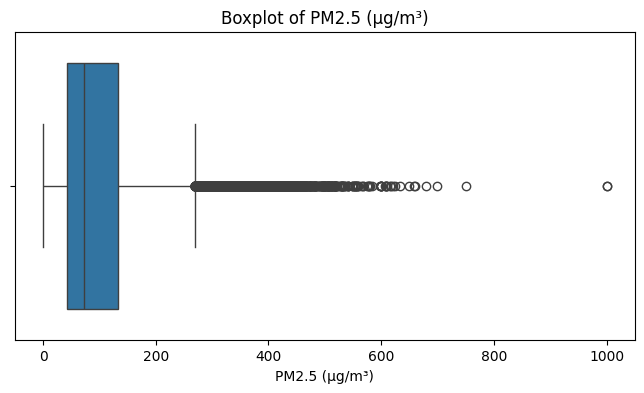

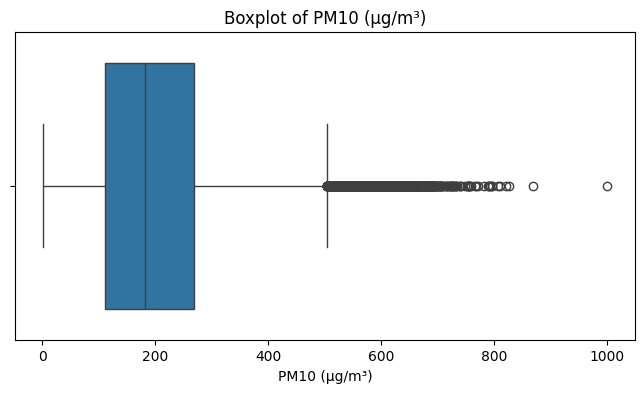

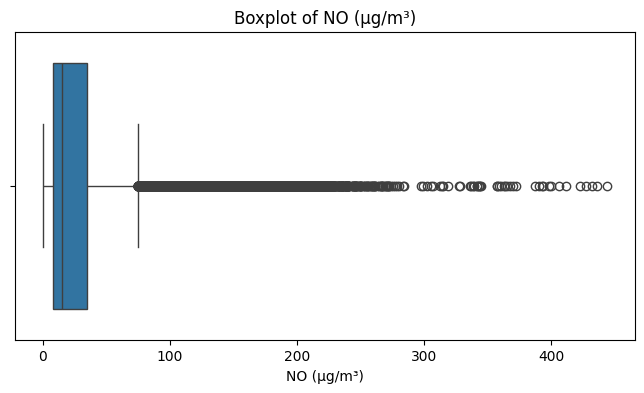

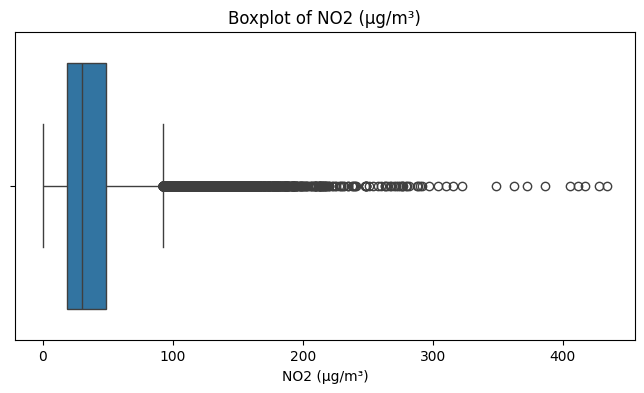

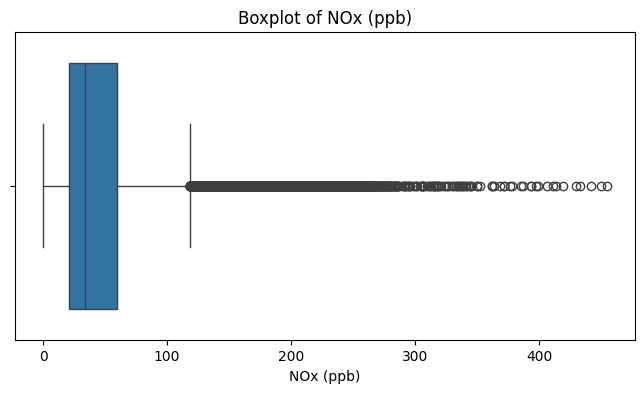

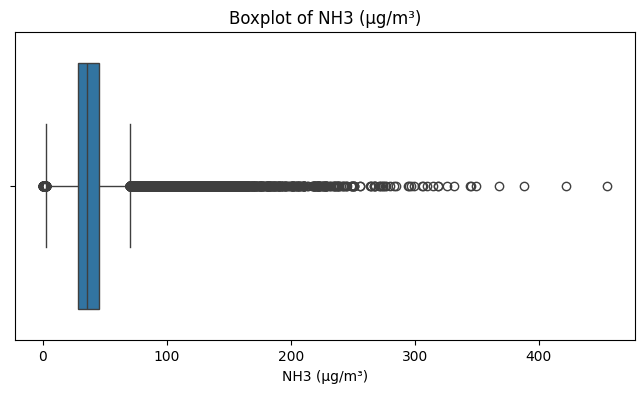

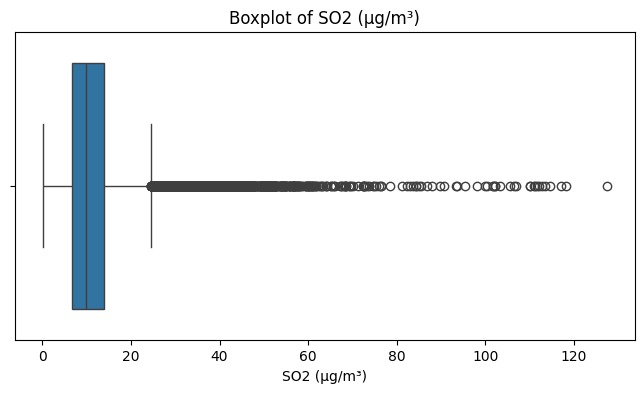

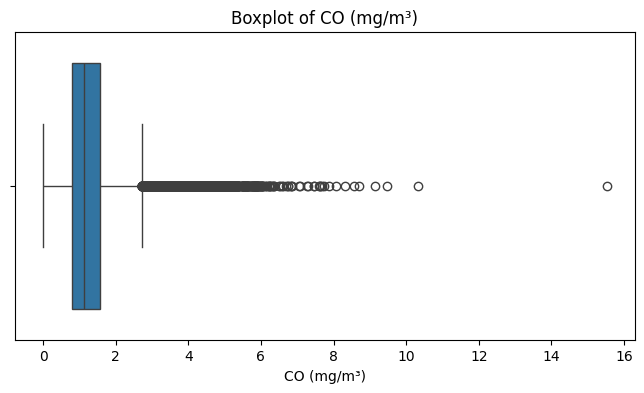

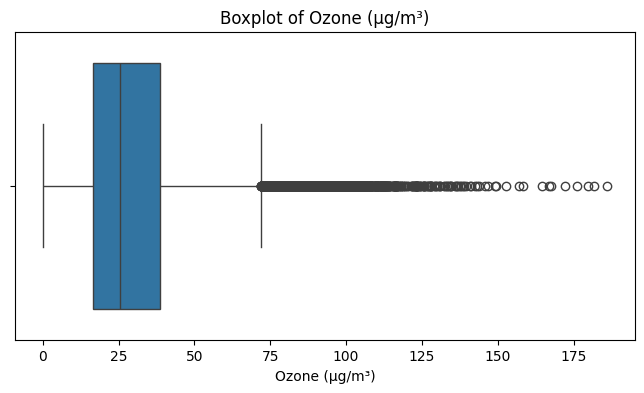

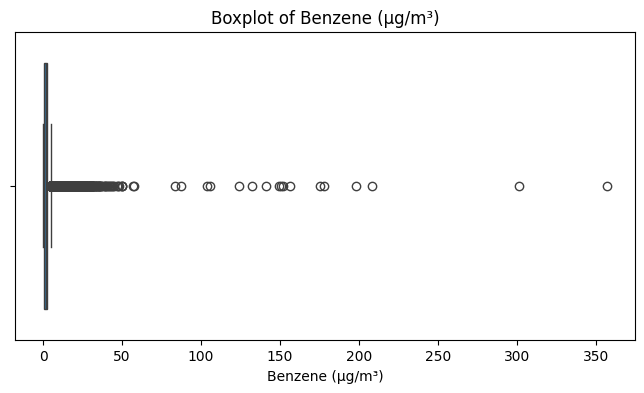

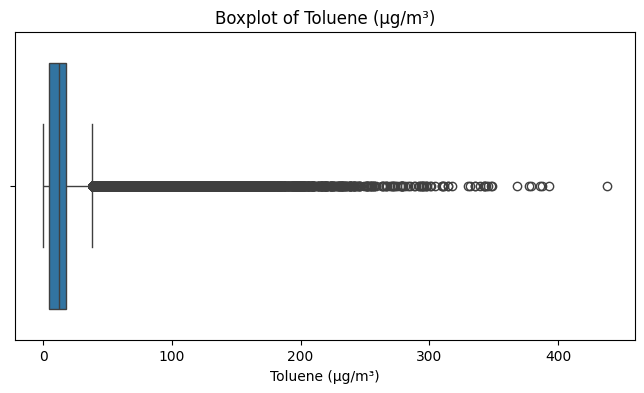

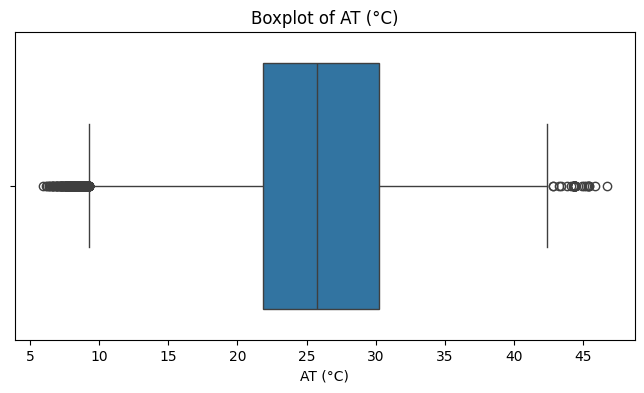

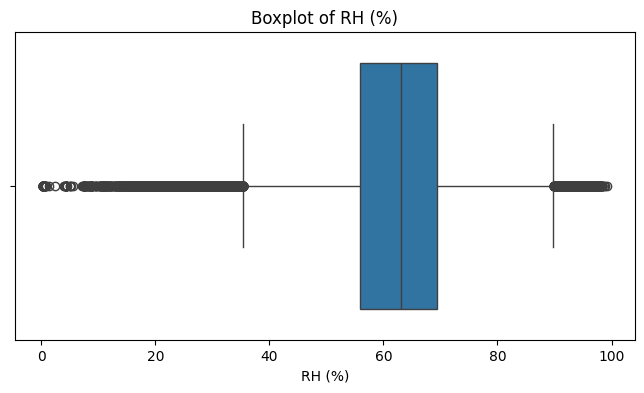

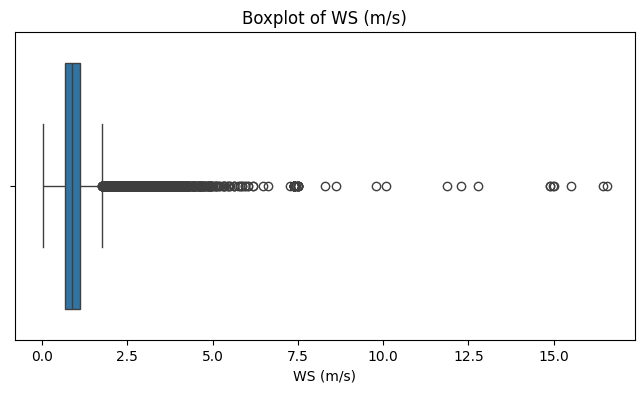

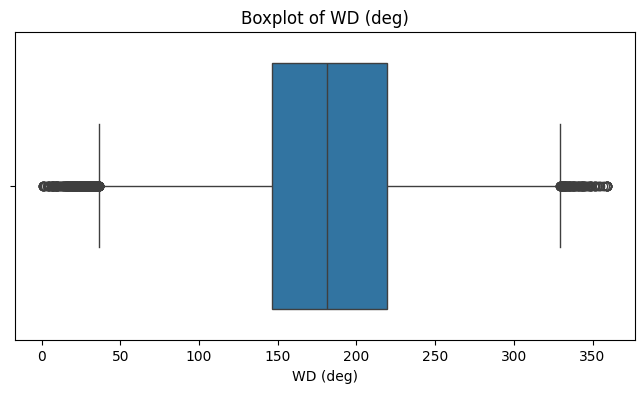

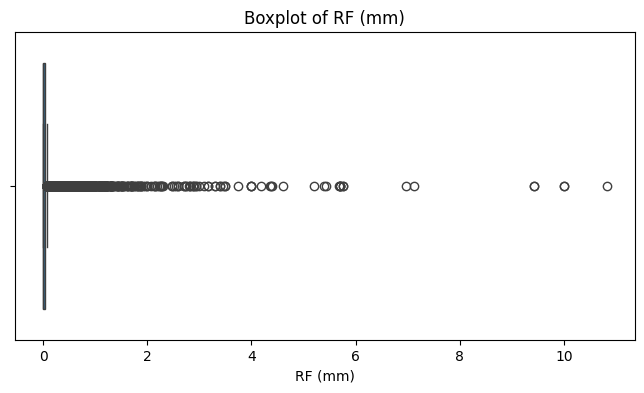

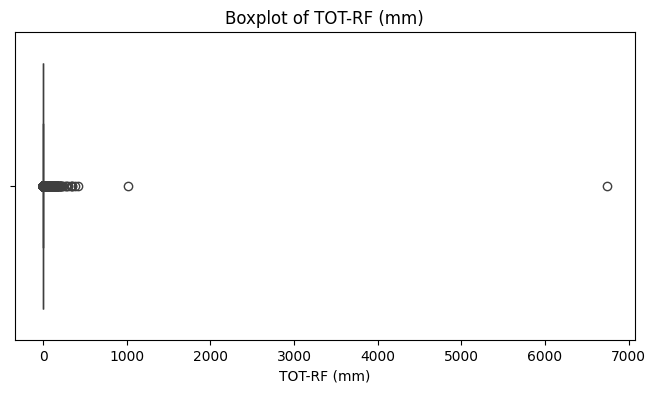

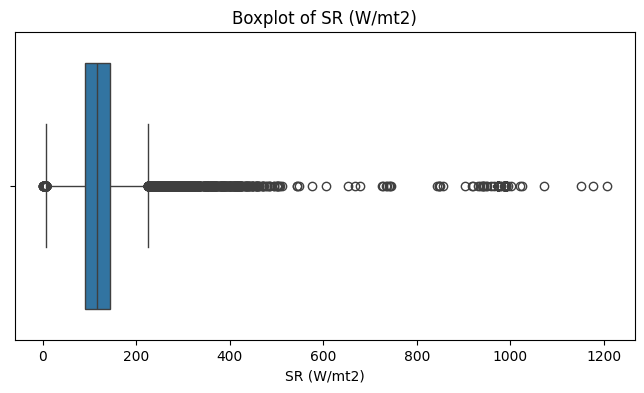

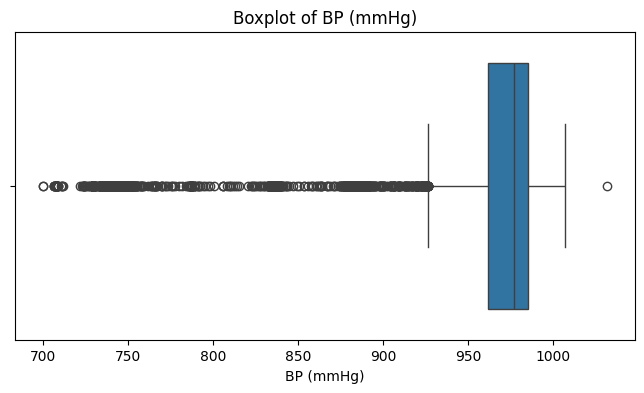

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns
numerical_cols = df_final.select_dtypes(include=['float64', 'int64']).columns

# Plot boxplots for each numerical column
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df_final[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


In [45]:
import pandas as pd
from sklearn.preprocessing import RobustScaler


In [46]:
numerical_columns = ['PM2.5 (µg/m³)', 'PM10 (µg/m³)', 'NO (µg/m³)', 'NO2 (µg/m³)',
                     'NOx (ppb)', 'NH3 (µg/m³)', 'SO2 (µg/m³)', 'CO (mg/m³)',
                     'Ozone (µg/m³)', 'Benzene (µg/m³)', 'Toluene (µg/m³)',
                     'AT (°C)', 'RH (%)', 'WS (m/s)', 'WD (deg)',
                     'RF (mm)', 'TOT-RF (mm)', 'SR (W/mt2)', 'BP (mmHg)']


In [47]:
scaler = RobustScaler()
df_final[numerical_columns] = scaler.fit_transform(df_final[numerical_columns])
print(df_final[numerical_columns].describe())


       PM2.5 (µg/m³)  PM10 (µg/m³)    NO (µg/m³)   NO2 (µg/m³)     NOx (ppb)  \
count   61791.000000  61791.000000  61791.000000  61791.000000  61791.000000   
mean        0.286044      0.129962      0.547478      0.248561      0.388022   
std         0.868783      0.754101      1.443632      0.960782      1.153260   
min        -0.793743     -1.150926     -0.560713     -1.027010     -0.868987   
25%        -0.335177     -0.447372     -0.283327     -0.386162     -0.338414   
50%         0.000000      0.000000      0.000000      0.000000      0.000000   
75%         0.664823      0.552628      0.716673      0.613838      0.661586   
max        10.173552      5.206260     15.911994     13.761433     10.750320   

        NH3 (µg/m³)   SO2 (µg/m³)    CO (mg/m³)  Ozone (µg/m³)  \
count  61791.000000  61791.000000  61791.000000   61791.000000   
mean       0.260213      0.224617      0.225633       0.203398   
std        1.394419      1.100395      1.006390       0.863886   
min       -2.09

In [48]:
df_final

,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),Benzene (µg/m³),Toluene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg)
0,1.828340,0.648622,-0.198292,0.763463,0.054471,-1.324631,0.583944,0.763891,-0.054119,0.093567,-0.625634,-2.359693,1.064706,0.000000,2.104869,0.289807,0.00,-0.236118,0.904636
1,1.593518,0.783338,1.595247,0.775392,1.067692,-1.579163,0.938519,1.139362,-0.148262,0.374269,0.399911,-2.310767,0.894853,0.000000,2.103228,0.289807,0.00,-0.025883,0.888833
2,1.555789,0.881719,1.466023,0.611111,0.970258,-1.013995,0.382926,1.255888,0.055790,0.356725,1.418830,-1.560171,0.488971,0.000000,1.194659,0.000000,0.00,-0.005153,0.807681
3,1.673693,0.887382,1.780542,0.671097,1.108866,-0.300006,0.286604,0.867469,-0.079344,0.175439,0.513288,-1.272581,0.256618,0.000000,0.993180,0.000000,0.00,-0.379943,0.768386
4,1.221818,0.458161,-0.216487,0.328221,-0.131448,-0.544498,0.080001,0.090631,0.236869,-0.216374,-0.212618,-1.745135,0.002941,0.000000,1.053323,0.000000,0.00,-0.475154,0.786752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61786,0.546089,1.117170,0.505384,1.770279,0.846482,1.175809,0.796131,0.647365,1.062087,5.836257,0.048737,0.463696,-0.567647,-1.318182,0.000000,0.000000,0.00,-0.598800,0.396366
61787,1.573447,2.055539,2.090605,1.882072,1.780681,1.384278,1.462006,0.038842,1.978745,8.730994,0.070824,0.588994,-0.126471,-1.318182,0.000000,0.000000,0.00,-0.384529,0.921294
61788,1.094481,1.760398,2.926476,1.871847,2.241515,1.510658,1.293094,2.110410,0.775603,6.777778,0.184937,0.559161,-0.240441,-1.318182,0.000000,0.000000,0.00,-0.527988,0.855945
61789,0.442333,1.506365,1.875603,2.022154,1.726721,2.141378,1.280531,0.673260,0.396777,5.543860,0.461017,0.599734,-0.151471,-1.318182,0.000000,0.342067,0.01,-0.483960,0.654772


In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Define features and target variable
X = df_final.drop('PM2.5 (µg/m³)', axis=1)
y = df_final['PM2.5 (µg/m³)']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [50]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


LinearRegression()

In [51]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [52]:
from sklearn.svm import SVR

svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)


SVR()

In [53]:
from sklearn.ensemble import GradientBoostingRegressor

gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gbr_model.fit(X_train, y_train)


GradientBoostingRegressor(random_state=42)

In [55]:
!pip install xgboost


Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 9.3 MB/s eta 0:00:00


In [57]:
!python3 -m pip install xgboost


Defaulting to user installation because normal site-packages is not writeable


In [60]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [61]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

models = {
    'Linear Regression': lr_model,
    'Random Forest': rf_model,
    'SVR': svr_model,
    'Gradient Boosting': gbr_model,
    'XGBoost': xgb_model,
    
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"{name} Performance:")
    print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
    print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
    print(f"R²: {r2_score(y_test, y_pred):.2f}\n")


Linear Regression Performance:
MAE: 0.27
MSE: 0.16
RMSE: 0.40
R²: 0.79

Random Forest Performance:
MAE: 0.20
MSE: 0.10
RMSE: 0.31
R²: 0.87

SVR Performance:
MAE: 0.25
MSE: 0.14
RMSE: 0.38
R²: 0.81

Gradient Boosting Performance:
MAE: 0.23
MSE: 0.12
RMSE: 0.34
R²: 0.84

XGBoost Performance:
MAE: 0.20
MSE: 0.10
RMSE: 0.31
R²: 0.87



In [68]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

models = {
    'Linear Regression': lr_model,
    'Random Forest': rf_model,
    'SVR': svr_model,
    'Gradient Boosting': gbr_model,
    'XGBoost': xgb_model,
}

for name, model in models.items():
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training metrics
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_rmse = np.sqrt(train_mse)
    train_r2 = r2_score(y_train, y_train_pred)

    # Testing metrics
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_rmse = np.sqrt(test_mse)
    test_r2 = r2_score(y_test, y_test_pred)

    # Print results
    print(f"{name} Performance:")
    print(f"  Training  - MAE: {train_mae:.2f}, MSE: {train_mse:.2f}, RMSE: {train_rmse:.2f}, R²: {train_r2:.2f}")
    print(f"  Testing   - MAE: {test_mae:.2f}, MSE: {test_mse:.2f}, RMSE: {test_rmse:.2f}, R²: {test_r2:.2f}\n")


Linear Regression Performance:
  Training  - MAE: 0.28, MSE: 0.17, RMSE: 0.41, R²: 0.78
  Testing   - MAE: 0.27, MSE: 0.16, RMSE: 0.40, R²: 0.79

Random Forest Performance:
  Training  - MAE: 0.09, MSE: 0.03, RMSE: 0.18, R²: 0.96
  Testing   - MAE: 0.20, MSE: 0.10, RMSE: 0.31, R²: 0.87

SVR Performance:
  Training  - MAE: 0.25, MSE: 0.15, RMSE: 0.39, R²: 0.80
  Testing   - MAE: 0.25, MSE: 0.14, RMSE: 0.38, R²: 0.81

Gradient Boosting Performance:
  Training  - MAE: 0.23, MSE: 0.12, RMSE: 0.35, R²: 0.84
  Testing   - MAE: 0.23, MSE: 0.12, RMSE: 0.34, R²: 0.84

XGBoost Performance:
  Training  - MAE: 0.19, MSE: 0.08, RMSE: 0.29, R²: 0.89
  Testing   - MAE: 0.20, MSE: 0.10, RMSE: 0.31, R²: 0.87



In [62]:
 # Generate predictions
y_pred_xgb = xgb_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)


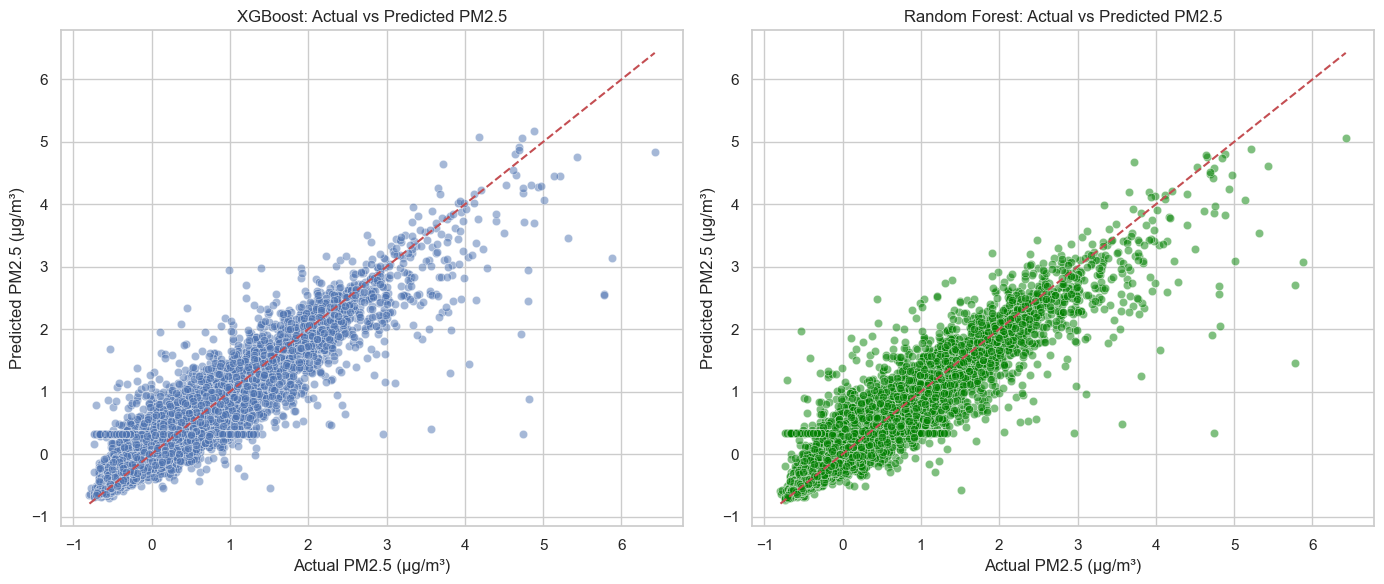

In [63]:
# Set plot style
sns.set(style="whitegrid")

# Create subplots
plt.figure(figsize=(14, 6))

# XGBoost Plot
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred_xgb, alpha=0.5')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('XGBoost: Actual vs Predicted PM2.5')
plt.xlabel('Actual PM2.5 (µg/m³)')
plt.ylabel('Predicted PM2.5 (µg/m³)')

# Random Forest Plot
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.5, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Random Forest: Actual vs Predicted PM2.5')
plt.xlabel('Actual PM2.5 (µg/m³)')
plt.ylabel('Predicted PM2.5 (µg/m³)')

plt.tight_layout()
plt.show()


In [64]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


In [65]:
# Initialize the model
dt_model = DecisionTreeRegressor(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

In [66]:

y_pred = dt_model.predict(X_test)


In [67]:

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Display the results
print(f"Decision Tree Regressor Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")


Decision Tree Regressor Performance:
Mean Absolute Error (MAE): 0.27
Mean Squared Error (MSE): 0.18
Root Mean Squared Error (RMSE): 0.43
R-squared (R²): 0.75


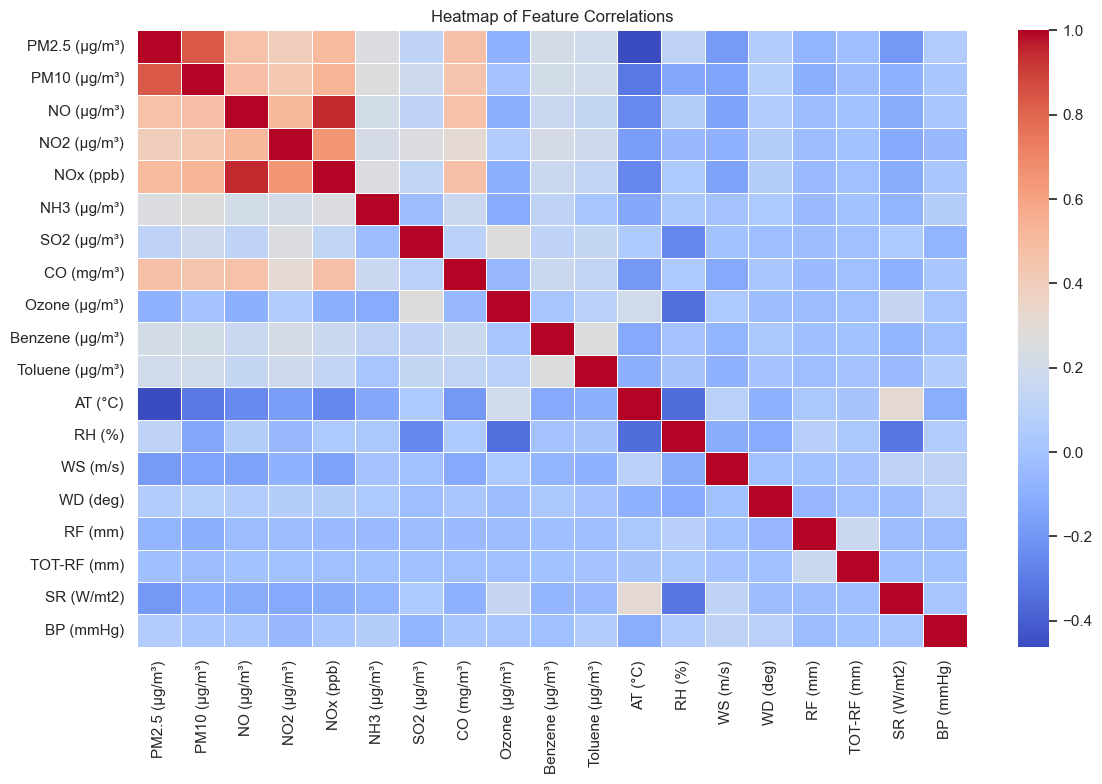

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation (faster and more meaningful for heatmaps)
corr = df_final.corr()

# Plot with options to avoid lag
plt.figure(figsize=(12, 8))
sns.heatmap(corr, cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Heatmap of Feature Correlations")
plt.tight_layout()
plt.show()


In [77]:
df

,Timestamp,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),Benzene (µg/m³),Toluene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg)
0,NaN,239.12,283.79,9.83,52.62,36.11,13.14,14.06,1.71,24.37,1.77,3.74,5.95,77.59,NaN,335.33,NaN,0.00,102.74,998.15
1,NaN,217.71,304.96,58.13,52.97,75.73,8.83,16.60,2.00,22.28,2.25,17.67,6.36,75.28,NaN,335.21,NaN,0.00,114.20,997.78
2,NaN,214.27,320.42,54.65,48.15,71.92,18.40,12.62,2.09,26.81,2.22,31.51,12.65,69.76,NaN,268.74,NaN,0.00,115.33,995.88
3,NaN,225.02,321.31,63.12,49.91,77.34,30.49,11.93,1.79,23.81,1.91,19.21,15.06,66.60,NaN,254.00,NaN,0.00,94.90,994.96
4,NaN,183.82,253.86,9.34,39.85,28.84,26.35,10.45,1.19,30.83,1.24,9.35,11.10,63.15,NaN,258.40,NaN,0.00,89.71,995.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61786,NaN,122.21,357.42,28.78,82.16,67.08,55.48,15.58,1.62,49.15,11.59,12.90,29.61,55.39,0.3,NaN,0.00,0.00,82.97,986.25
61787,NaN,215.88,504.88,71.47,85.44,103.61,59.01,20.35,1.15,69.50,16.54,13.20,30.66,61.39,0.3,NaN,0.00,0.00,94.65,998.54
61788,NaN,172.21,458.50,93.98,85.14,121.63,61.15,19.14,2.75,42.79,13.20,14.75,30.41,59.84,0.3,NaN,0.00,0.00,86.83,997.01
61789,NaN,112.75,418.58,65.68,89.55,101.50,71.83,19.05,1.64,34.38,11.09,18.50,30.75,61.05,0.3,NaN,0.01,0.01,89.23,992.30


In [80]:
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import root_mean_squared_error

rmse = root_mean_squared_error(y_test, y_pred)  # ✅ Clean and future-proof


best_models = {}

for name, config in param_grids.items():
    print(f"\nTuning {name}...")
    
    # Create GridSearchCV with negative MSE as scoring (to maximize, so it's neg)
    grid = GridSearchCV(
        estimator=config['model'], 
        param_grid=config['params'], 
        cv=5, 
        scoring='neg_mean_squared_error', 
        n_jobs=-1
    )
    
    # Fit the model on training data
    grid.fit(X_train, y_train)

    # Best model from the grid search
    best_model = grid.best_estimator_
    best_models[name] = best_model

    # Predict on test data and calculate RMSE
    y_pred = best_model.predict(X_test)
    rmse = root_mean_squared_error(y_test, y_pred)
    
    print(f"Best Params: {grid.best_params_}")
    print(f"Test RMSE: {rmse:.4f}")


Tuning Random Forest...
Best Params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Test RMSE: 0.3113

Tuning Gradient Boosting...
Best Params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Test RMSE: 0.3252

Tuning SVR...


KeyboardInterrupt: 

change colour of scatter plot

In [ ]:
scatter plot color to be based on the format mentioned in other parameters